In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train_na_filled.csv')
test = pd.read_csv(filepath_home+'test_na_filled.csv')

In [3]:
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]
train[total_negative_cols] = 6-train[total_negative_cols]
train['mach_score'] = train.apply(lambda x:x.iloc[0:40:2].mean(),axis=1)

In [4]:
train[['tp02','tp04','tp06','tp08','tp10']]= 6-train[['tp02','tp04','tp06','tp08','tp10']]

train['Extraversion']=(train.tp01+train.tp06)/2
train['Agreeableness']=(train.tp02+train.tp07)/2
train['Conscientiousness']=(train.tp03+train.tp08)/2
train['Emotional Stability']=(train.tp04+train.tp09)/2
train['Openness to Experiences']=(train.tp05+train.tp10)/2

# 1. TIPI 유형과 MACH 점수와의 관계

In [19]:
# TIPI
tp_cols = ['Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Openness to Experiences']
#train.groupby(tp_cols)['voted'].mean()
train[['mach_score']+tp_cols].corr(method='spearman')

,mach_score,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences
mach_score,1.000000,0.084890,0.478096,0.107476,-0.015156,-0.008133
Extraversion,0.084890,1.000000,0.074520,0.046874,0.087655,0.231944
Agreeableness,0.478096,0.074520,1.000000,0.096895,0.077835,0.080684
Conscientiousness,0.107476,0.046874,0.096895,1.000000,0.282084,0.043331
Emotional Stability,-0.015156,0.087655,0.077835,0.282084,1.000000,0.102359
Openness to Experiences,-0.008133,0.231944,0.080684,0.043331,0.102359,1.000000


Agreeableness(친화성) 특성과 마키아적 성향은 서로 영향이 있다.

In [25]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

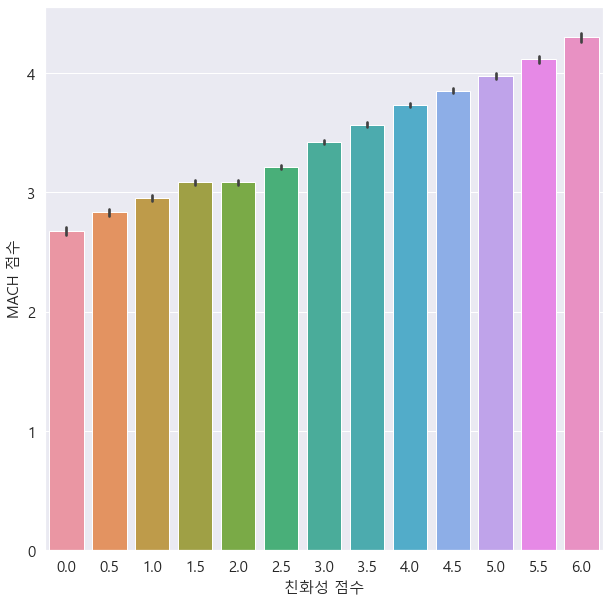

In [28]:
# plt.figure(figsize=(10,10))
fig , ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Agreeableness',y='mach_score',data=train[(train.Agreeableness<=6)&(train.Agreeableness>=0)],ax=ax)
ax.set_xticklabels('0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0'.split(),fontsize=15)
ax.set_yticklabels('0 1 2 3 4'.split(),fontsize=15)
ax.set_ylabel('MACH 점수',fontsize=15)
ax.set_xlabel('친화성 점수',fontsize=15)

fig.savefig(figpath+'tipi_mach_bar.png',dpi=fig.dpi,transparent=True)

실제로 친화성 수치와 마키아 점수와의 관계가 직선형태를 이룸

In [17]:
figpath='C:/Users/이동재/Desktop/그림/'

# 2. 명목형 : age_group

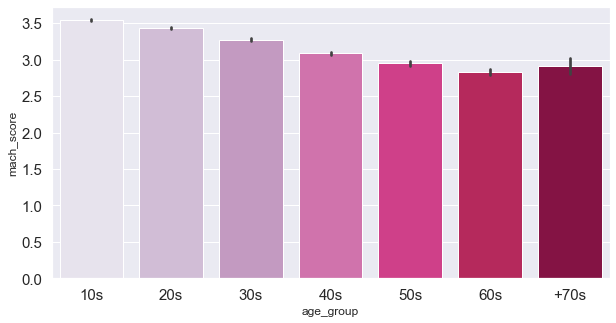

In [18]:
# age_group
plt.figure(figsize=(10,5))
sns.barplot(x='age_group',y='mach_score',data=train,
           order=['10s','20s','30s','40s','50s','60s','+70s'],
           palette='PuRd')
fig = plt.gcf()
ax = plt.gca()
ax.set_xticklabels(['10s','20s','30s','40s','50s','60s','+70s'],fontsize=15)
ax.set_yticklabels('0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5'.split(),fontsize=15)

fig.savefig(figpath+'age_mach.png',dpi=fig.dpi)

- 연령대가 높아질수록 마키아벨리즘 성향이 낮아지는것을 확인할 수 있음 

# ---
(확정 아님)  
Tp 성향으로 kmeans 군집화한 마키아벨리즘 스코어 그룹은 마키아벨리즘 스코어가 낮으면 투표율이 높았고 반대로 마키아벨리즘 스코어가 높으면 투표율이 낮았다. 